In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
database = pd.read_csv("trips_data.csv")

In [109]:
df = database.dropna(subset = ["Product Type"])

In [110]:
print(database.shape)
print(df.shape)
print(df.columns)


#Estamos quitando los Valorees $ 0 en Fare Amount columna
df = df[df['Fare Amount'] != 0]

(206, 15)
(202, 15)
Index(['City', 'Product Type', 'Trip or Order Status', 'Request Time',
       'Begin Trip Time', 'Begin Trip Lat', 'Begin Trip Lng',
       'Begin Trip Address', 'Dropoff Time', 'Dropoff Lat', 'Dropoff Lng',
       'Dropoff Address', 'Distance (miles)', 'Fare Amount', 'Fare Currency'],
      dtype='object')


In [111]:
#Nos da mucho la cantidad de $ porque no hemos convertido la COP -> MXN, USD -> MXN
total_fare = df["Fare Amount"].sum()
print("$", total_fare)
print("-----")

fare_currency = "Fare Currency"
unique_value_currency = df[fare_currency].unique()
print("Tipos de divisa:", unique_value_currency)

$ 205443.63999999998
-----
Tipos de divisa: ['MXN' 'USD' 'COP']


In [112]:
money = df["Fare Amount"]
currency = df["Fare Currency"]


for valor1, valor2 in zip(money, currency):
    print(f'Money$: {valor1}, Currency: {valor2}')

Money$: 50.0, Currency: MXN
Money$: 199.92, Currency: MXN
Money$: 104.7, Currency: MXN
Money$: 69.92, Currency: MXN
Money$: 69.93, Currency: MXN
Money$: 49.95, Currency: MXN
Money$: 129.96, Currency: MXN
Money$: 99.96, Currency: MXN
Money$: 99.97, Currency: MXN
Money$: 272.0, Currency: MXN
Money$: 49.9, Currency: MXN
Money$: 22.0, Currency: MXN
Money$: 50.06, Currency: MXN
Money$: 89.94, Currency: MXN
Money$: 133.93, Currency: MXN
Money$: 89.98, Currency: MXN
Money$: 99.93, Currency: MXN
Money$: 89.95, Currency: MXN
Money$: 79.97, Currency: MXN
Money$: 49.9, Currency: MXN
Money$: 73.32, Currency: MXN
Money$: 39.96, Currency: MXN
Money$: 89.97, Currency: MXN
Money$: 49.94, Currency: MXN
Money$: 79.95, Currency: MXN
Money$: 81.51, Currency: MXN
Money$: 89.94, Currency: MXN
Money$: 59.94, Currency: MXN
Money$: 423.46, Currency: MXN
Money$: 299.93, Currency: MXN
Money$: 179.96, Currency: MXN
Money$: 179.92, Currency: MXN
Money$: 189.9, Currency: MXN
Money$: 501.51, Currency: MXN
Money$: 35

In [113]:
# Con solo cambiar el "Valor" USD podemos explorar por MXN & COP
divise = "USD"

df_divise = df[df["Fare Currency"] == divise]

print(df_divise.shape)

print(df_divise)

(2, 15)
      City Product Type Trip or Order Status                   Request Time  \
73  Denver        UberX            COMPLETED  2023-03-04 22:53:29 +0000 UTC   
74  Denver        UberX            COMPLETED  2023-03-02 14:35:09 +0000 UTC   

                  Begin Trip Time  Begin Trip Lat  Begin Trip Lng  \
73  2023-03-04 22:58:32 +0000 UTC        39.76632      -104.97306   
74  2023-03-02 14:41:06 +0000 UTC        39.79503      -104.91350   

                                  Begin Trip Address  \
73           3550 N Downing St, Denver, CO 80205, US   
74  5401 Monaco St, Commerce City, CO 80022-4315, US   

                     Dropoff Time  Dropoff Lat  Dropoff Lng  \
73  2023-03-04 23:04:24 +0000 UTC     39.78014   -104.96994   
74  2023-03-02 14:51:07 +0000 UTC     39.78058   -104.96976   

                           Dropoff Address  Distance (miles)  Fare Amount  \
73  4655 Humboldt St, Denver, CO 80216, US              1.25        14.82   
74  4655 Humboldt St, Denver, CO 

In [114]:
#tipos de cambio
mxn_udd = 20
mxn_cop = 240

# Filtra las filas en las que la columna "Fare Currency" es igual a 'USD o COP'
filas_usd = df['Fare Currency'] == 'USD'
filas_cop = df['Fare Currency'] == 'COP'

# Aplica la conversión a las filas correspondientes
df.loc[filas_usd, 'Fare Amount'] *= mxn_udd
df.loc[filas_cop, 'Fare Amount'] /= mxn_cop

In [115]:
# here for clear reason we are re-neaming the total_fare variable
total_fare = df["Fare Amount"].sum()
print("$", total_fare)

$ 14382.769999999999


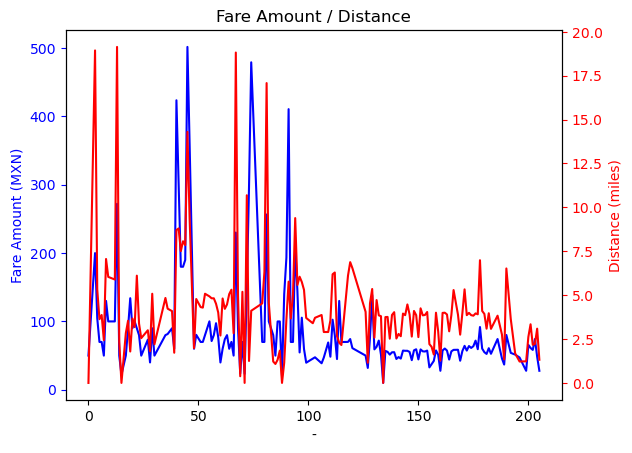

In [226]:
# Crear una figura y ejes principales
fig, ax1 = plt.subplots()

# Gráfica de la columna "Fare Amount" con la escala izquierda (dinero en pesos)
ax1.plot(df.index, df['Fare Amount'], 'b', label='Fare Amount')
ax1.set_xlabel('-')
ax1.set_ylabel('Fare Amount (MXN)', color='b')
ax1.tick_params('y', colors='b')

# Crear ejes secundarios para la columna de millas
ax2 = ax1.twinx()
ax2.plot(df.index, df['Distance (miles)'], 'r', label='Distance (miles)')
ax2.set_ylabel('Distance (miles)', color='r')
ax2.tick_params('y', colors='r')

# Título de la gráfica
plt.title('Fare Amount / Distance')

# Muestra la gráfica
plt.show()

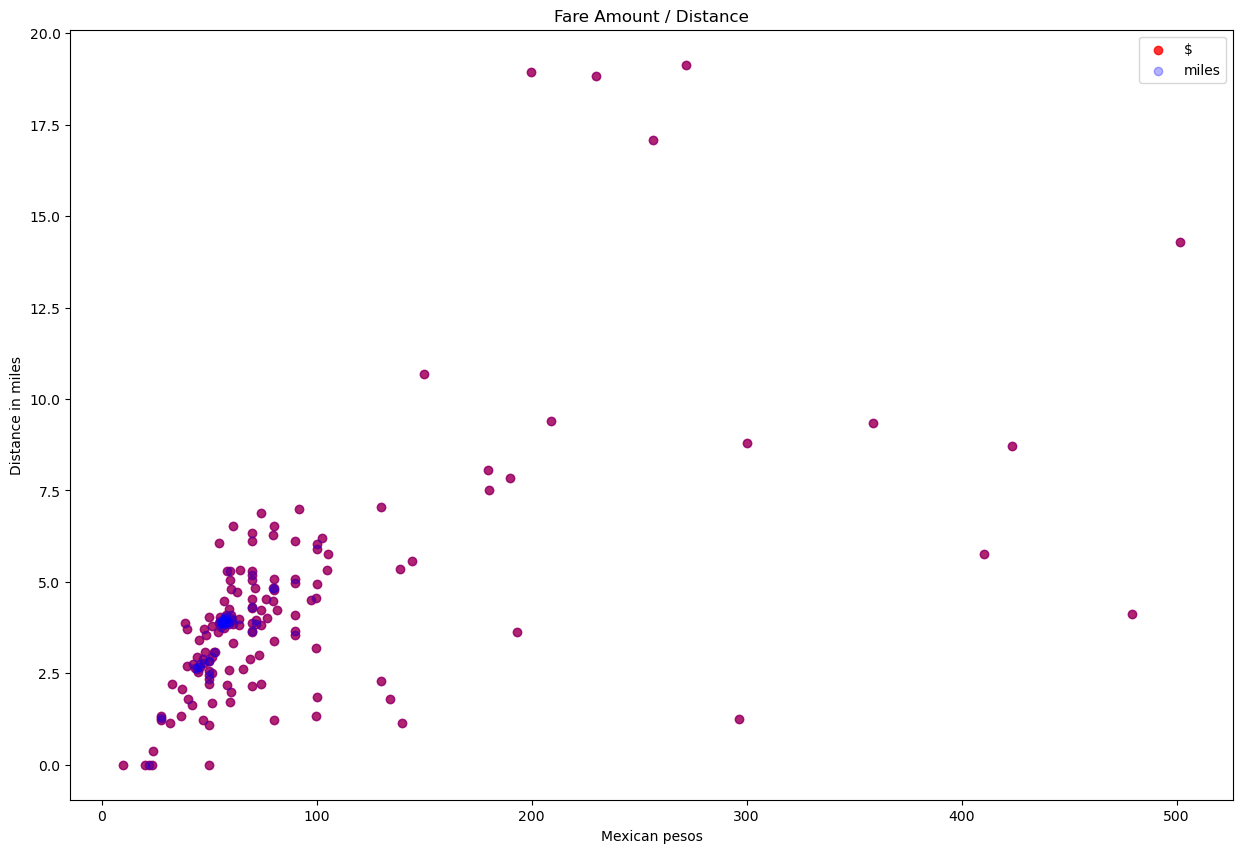

In [227]:
# set the size of the graph
plt.figure(figsize=(15,10))

#create the scatter graph for "Fare Amount" with a specific color and legend
plt.scatter(df["Fare Amount"], df["Distance (miles)"], c="r", alpha=0.8, label="$")

#create a second graph fot "Distance (miles)" with a color and legend
plt.scatter(df["Fare Amount"], df["Distance (miles)"], c="b", alpha=0.3, label="miles")

#axis legends
plt.xlabel("Mexican pesos")
plt.ylabel("Distance in miles")
plt.title("Fare Amount / Distance")

plt.legend()
plt.show()
